## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Data Cleaning

In [2]:
data = pd.read_csv("phones_data.csv")

In [3]:
data.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1224 non-null   int64  
 1   brand_name      1224 non-null   object 
 2   model_name      1224 non-null   object 
 3   os              1027 non-null   object 
 4   popularity      1224 non-null   int64  
 5   best_price      1224 non-null   float64
 6   lowest_price    964 non-null    float64
 7   highest_price   964 non-null    float64
 8   sellers_amount  1224 non-null   int64  
 9   screen_size     1222 non-null   float64
 10  memory_size     1112 non-null   float64
 11  battery_size    1214 non-null   float64
 12  release_date    1224 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 124.4+ KB


In [5]:
data.drop('Unnamed: 0', axis = 1, inplace= True)

In [6]:
data.drop('os', axis = 1, inplace= True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      1224 non-null   object 
 1   model_name      1224 non-null   object 
 2   popularity      1224 non-null   int64  
 3   best_price      1224 non-null   float64
 4   lowest_price    964 non-null    float64
 5   highest_price   964 non-null    float64
 6   sellers_amount  1224 non-null   int64  
 7   screen_size     1222 non-null   float64
 8   memory_size     1112 non-null   float64
 9   battery_size    1214 non-null   float64
 10  release_date    1224 non-null   object 
dtypes: float64(6), int64(2), object(3)
memory usage: 105.3+ KB


In [8]:
data.isna().sum()

brand_name          0
model_name          0
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

In [9]:
rata_low = data["lowest_price"].mean()
data["lowest_price"] = data["lowest_price"].fillna(rata_low)
data["lowest_price"].isna().sum()

0

In [10]:
rata_high = data["highest_price"].mean()
data["highest_price"] = data["highest_price"].fillna(rata_high)
data["highest_price"].isna().sum()

0

In [11]:
rata_high = data["screen_size"].mean()
data["screen_size"] = data["screen_size"].fillna(rata_high)
data["screen_size"].isna().sum()

0

In [12]:
rata_high = data["memory_size"].mean()
data["memory_size"] = data["memory_size"].fillna(rata_high)
data["memory_size"].isna().sum()

0

In [13]:
rata_high = data["battery_size"].mean()
data["battery_size"] = data["battery_size"].fillna(rata_high)
data["battery_size"].isna().sum()

0

In [14]:
data.isna().sum()

brand_name        0
model_name        0
popularity        0
best_price        0
lowest_price      0
highest_price     0
sellers_amount    0
screen_size       0
memory_size       0
battery_size      0
release_date      0
dtype: int64

In [15]:
data.duplicated().sum()

0

## K-Means Clustering

In [16]:
points = data[['sellers_amount', 'battery_size']]
points = points.values

In [17]:
model = KMeans(n_clusters=5)
model.fit(points)

KMeans(n_clusters=5)

In [18]:
y = model.fit_predict(points)
print(y)

[1 1 1 ... 2 2 1]


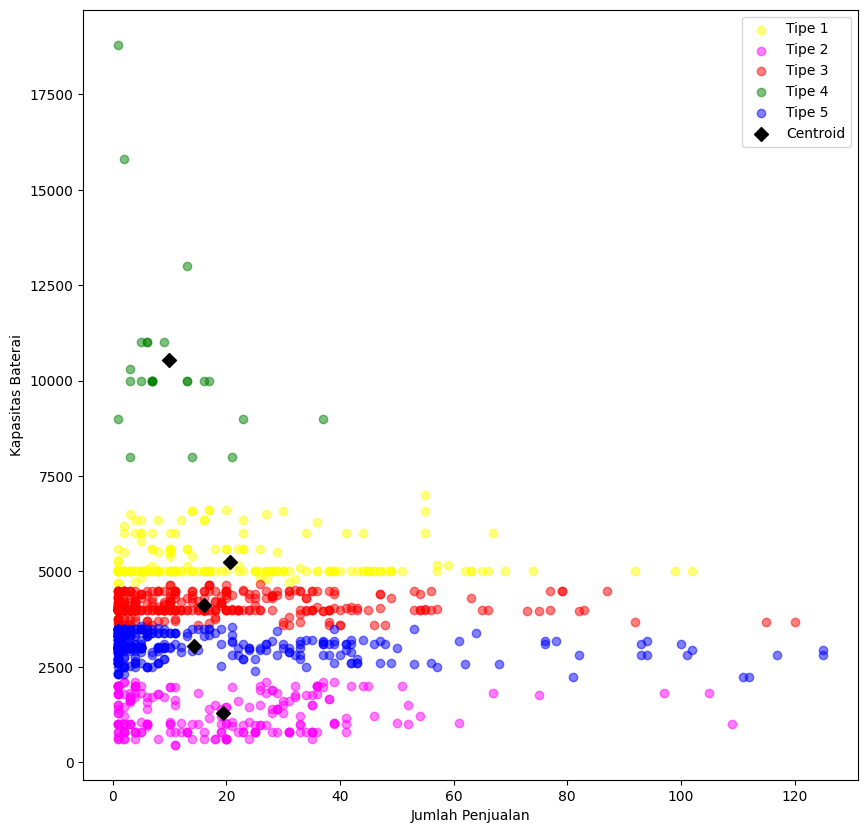

In [19]:
centroids = model.cluster_centers_

centroid_x = centroids[:,0]
centroid_y = centroids[:,1]

plt.figure(figsize=(10,10))
plt.scatter(points[y==0,0], points[y==0,1], c='yellow', label='Tipe 1', alpha=0.5)
plt.scatter(points[y==1,0], points[y==1,1], c='magenta', label='Tipe 2', alpha=0.5)
plt.scatter(points[y==2,0], points[y==2,1], c='red', label='Tipe 3', alpha=0.5)
plt.scatter(points[y==3,0], points[y==3,1], c='green', label='Tipe 4', alpha=0.5)
plt.scatter(points[y==4,0], points[y==4,1], c='blue', label='Tipe 5', alpha=0.5)

plt.scatter(centroid_x, centroid_y, marker="D", s=50, label="Centroid", c='black')
plt.xlabel("Jumlah Penjualan")
plt.ylabel("Kapasitas Baterai")
plt.legend()
plt.show()

In [20]:
cluster = range(1,7)
inertias = []

for n in cluster:
    model = KMeans(n_clusters=n)
    model.fit(points)
    inertias.append(model.inertia_)

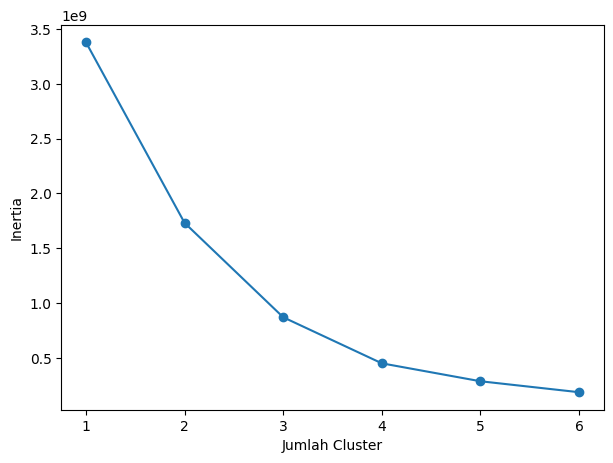

In [21]:
plt.figure(figsize = (7,5))
plt.plot(cluster, inertias, '-o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.xticks(cluster)
plt.show()

## Hierarchical Clustering

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage, complete

In [23]:
linkage_hr = linkage(points, method='ward')
complete_hr = complete(points)

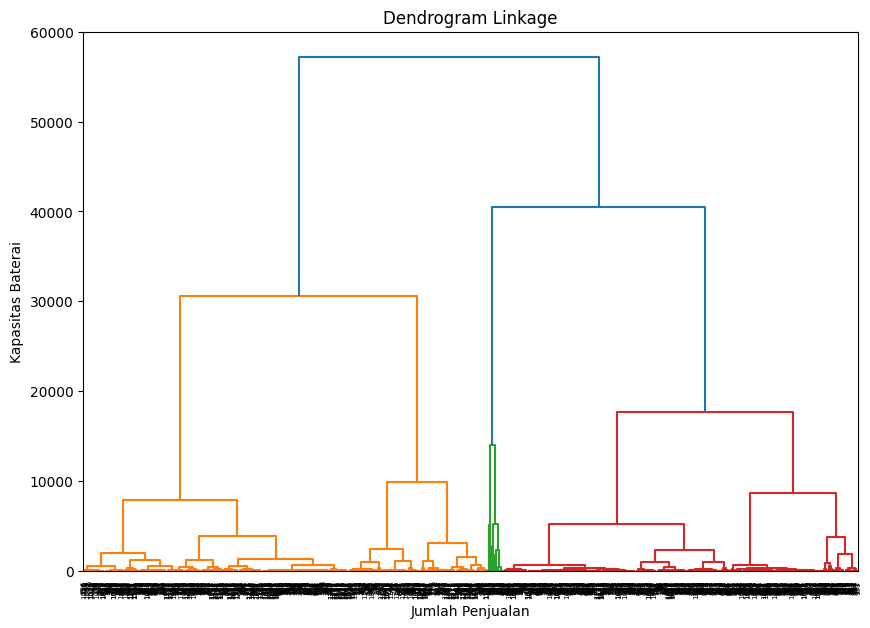

In [24]:
plt.figure(figsize = (10,7))
dendrogram(linkage_hr)
plt.title("Dendrogram Linkage")
plt.xlabel("Jumlah Penjualan")
plt.ylabel("Kapasitas Baterai")
plt.show()

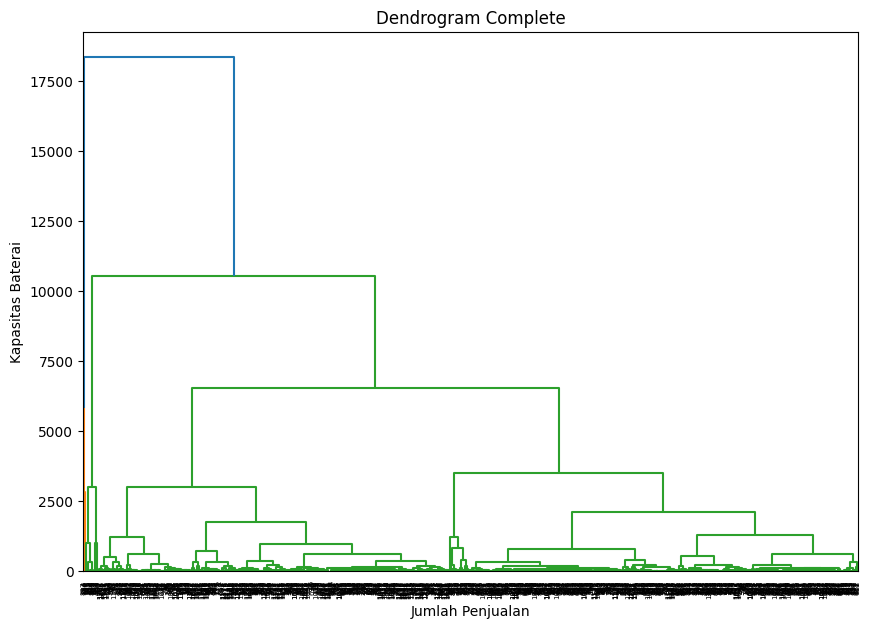

In [25]:
plt.figure(figsize = (10,7))
dendrogram(complete_hr)
plt.title("Dendrogram Complete")
plt.xlabel("Jumlah Penjualan")
plt.ylabel("Kapasitas Baterai")
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
hr_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [28]:
hr_predict = hr_cluster.fit_predict(points)

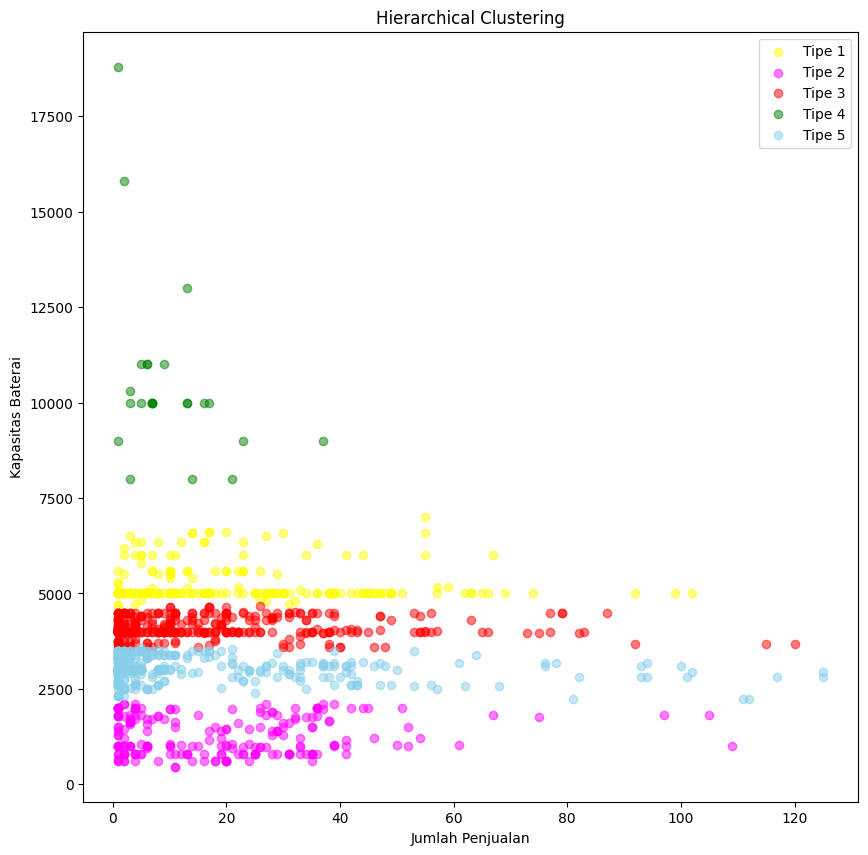

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(points[y==0,0], points[y==0,1], c='yellow', label='Tipe 1', alpha=0.5)
plt.scatter(points[y==1,0], points[y==1,1], c='magenta', label='Tipe 2', alpha=0.5)
plt.scatter(points[y==2,0], points[y==2,1], c='red', label='Tipe 3', alpha=0.5)
plt.scatter(points[y==3,0], points[y==3,1], c='green', label='Tipe 4', alpha=0.5)
plt.scatter(points[y==4,0], points[y==4,1], c='skyblue', label='Tipe 5', alpha=0.5)

plt.title("Hierarchical Clustering")
plt.xlabel("Jumlah Penjualan")
plt.ylabel("Kapasitas Baterai")
plt.legend()
plt.show()